<a href="https://colab.research.google.com/github/obengdouglas/DSI-2022/blob/main/DSI_2022capstone_bloodservicegh_mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**<center>Improving Blood service Management in Ghana through Data analytics</center>**
> 

<center><h3>Data science Intensive Program (DSI), 2022

Capstone Project - Douglas Obeng</h3></center>

<center><img src='https://raw.githubusercontent.com/obengdouglas/DSI-2022/main/capstone_bloodservice/Data/save_a_life_give_blood.jpg' ></center>

#**1. Overview**

- This notebook is submitted as report for the fourth and final project (Capstone) of the [Africa DSI program 2022](http://dsi-program.com/).

- The goal of the capstone project is to afford the program participants the opportunity to apply an area of Data Science in solving a problem in a way that is beneficial to the career and learning aspirations of participants.

- My project focuses on the area of blood donations and blood service management as an essential component of quality health delivery. It focuses on data analytics for improved understanding for better informed decision making. The project is set in Ghana, a country with historical poor voluntary donation record. Data used for this project is not real and has been made up (dummy data).



# **2. Introduction**

A blood donation occurs when a person voluntarily has blood drawn from his/her body for use as transfusions for a different person. Donation may be of whole blood, or of specific components directly (apheresis). Blood banks often participate in the collection process as well as the procedures that follow it.

Blood donors may be unpaid volunteers who donate blood for a community supply (voluntary donations). However, established supplies are usually limited and patients have to rely on friends and family members to donate blood on their behalf, to replenish the supply they use if they get a transfusion (directed donation).

Some information on blood donations in Ghana:

- A National Blood Service Bill was passed in 2020 (Act 1042) with the primary goal of establishing the National Blood Service as the primary agency for blood and products collection, processing, storage, distribution, and related matters. 

- As at May 2022, the voluntary donations rate for 2022 is 26%. The vision and recommendation of the World Health Organization is to achieve 100% voluntary non-remunerated blood donation in every country of the world.

- Cost: Blood is never sold in Ghana, but patients pay a processing fee of 50 to 200 Ghanaian cedi (about 11usd to 45usd), to cover expenses.

- Replacement requirement: Patients who receive blood transfusions are often asked to ensure that someone replaces the amount used on their behalf, regardless of blood type.

- Other factors: Patients who cannot pay the processing fee but who urgently need a blood transfusion do receive one, but they must arrange to pay the fee at a later date.

- In more extreme cases, patients are charged a high price for blood and are refused medical treatment if they can’t pay.


References:

[Wikipedia](https://en.wikipedia.org/wiki/Blood_donation)

[National blood Service, Ghana](https://nbs.gov.gh/)

[Global Press Journal](https://globalpressjournal.com/africa/blood-transfusion-africa-free-rwanda-unaffordable-zimbabwe/)



#**3. Objectives of Project**

1. Develop a database system for monitoring blood donations. This includes building an Entity-Relationship (ER) database model that links other important aspects of the blood service management system such as transfusions, blood processing and logistics.

2. Build a data analytics dashboard to offer quick understanding and insights of status of blood donations. The analytics portion cover the donations of  20634 donors over the past 2 years (2020 and 2021 only)

3. Use data analytics tools to forecast blood donation trends in order to mitigate shortages and or prevent unnecessary wastage

4. Use far historical data to build a model that predicts whether one is likely to donate in a target month or not. This model is built using 748 of the sample donors. However, it uses the summary of donations made over the past 8years.

5. Use Tableau dashboard for further analytics of data


#**4. Data**

An extensive search for data that could be used for this project did not yield satifactory results. This is most likely due to the strict privacy policies that exist in most countries to protect patients and other stakeholders in healthcare delivery such as blood donors and healthcare employees.

As such, the data for this project is a combination of:

- dummy data generated for the analytics of donations over the past 2years. The data covered variables such as city of donation, age of donor, blood group and gender.

- Blood Transfusion Service Center Data Set from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center). this data was used to predict the chance of a donor making a donation in a target month. 

A significant drawback of using dummy data is the absence of inherent biases that are important for drawing correlations and trends in data. As such, the results of the analysis may be unrealistic and misleading. **The project is however meant to demonstrate how data analytics *may* be used for improved blood donation management**.

On a personal level, generating dummy data afforded me the opportunity to implement the design of a database project from scratch using an Entity–relationship model (ER model). This is an essential skill in Data science and would often require significant engagements with stakeholders and end users.

Data for the project has been saved as 2 csv files in [github](https://github.com/obengdouglas/DSI-2022/tree/main/capstone_bloodservice/Data). These are:

- bloodservice_donor: This data covers the identifying data for all the donors including summary of past donation statistics first donation, last donation and number of donations.

- bloodservice_donation: This data covers the details of all donation transactions for all donors in the years 2020 and 2021. Each transaction, with a unique donationID records the facilityID,	donorID,	donation_date, donation_amount in cubic centimeters and blood_type.

#**5. Libraries and Files**


In [1]:
#import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import seaborn as sns
import sklearn
import scipy
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
sns.set_style('ticks')
import plotly.offline as py
from IPython.display import Image
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.tools as tls
import warnings
import os

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import csv
from tqdm import tqdm
import time
from datetime import timedelta
from datetime import date
from datetime import datetime, date
import datetime as dt

import plotly.io as pio #uncomment if working in colab
pio.renderers.default = "colab" #uncomment if working in colab

import plotly.express as px
import warnings
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline
#pio.templates.default = "plotly_dark"
warnings.filterwarnings('ignore')

In [2]:
#1. Read the input files into three separate dataframes using the read_csv method in Pandas. Files are stored in https://github.com/obengdouglas/DSI-2022/tree/main/capstone_bloodservice/Data

donors='https://raw.githubusercontent.com/obengdouglas/DSI-2022/main/capstone_bloodservice/Data/bloodservice_donor.csv'
donations='https://raw.githubusercontent.com/obengdouglas/DSI-2022/main/capstone_bloodservice/Data/bloodservice_donations.csv'


df_donors = pd.read_csv(donors, sep=",", skip_blank_lines=True, na_filter=True)
df_donations = pd.read_csv(donations, sep=",", skip_blank_lines=True, na_filter=True)

#**6. Review Dataframes**

In [3]:
#  Information for donors dataframe
df_donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   donorID                            20634 non-null  object 
 1   city                               20634 non-null  object 
 2   region                             20634 non-null  object 
 3   country                            20634 non-null  object 
 4   latitude                           20634 non-null  float64
 5   longitude                          20634 non-null  float64
 6   gender                             20634 non-null  object 
 7   birth_date                         20634 non-null  object 
 8   blood_type                         20634 non-null  object 
 9   recency_months                     748 non-null    float64
 10  frequency_times                    748 non-null    float64
 11  monetary_total_donation_amount_cc  748 non-null    flo

In [4]:
#View donors dataframe
df_donors.head()

,donorID,city,region,country,latitude,longitude,gender,birth_date,blood_type,recency_months,frequency_times,monetary_total_donation_amount_cc,time_months_since_first_donation,donated_blood_observed_month
0,D000000001,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,16/11/1993,O+,2.0,50.0,12500.0,98.0,1.0
1,D000000002,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,08/10/1995,B+,0.0,13.0,3250.0,28.0,1.0
2,D000000003,Accra,Greater Accra,Ghana,5.588026,-0.18255,Female,25/11/1994,O+,1.0,16.0,4000.0,35.0,1.0
3,D000000004,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,11/12/1965,A+,2.0,20.0,5000.0,45.0,1.0
4,D000000005,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,20/09/1994,O+,1.0,24.0,6000.0,77.0,0.0


In [5]:
#  Information for donations dataframe
df_donations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31613 entries, 0 to 31612
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   facilityID          31613 non-null  object
 1   donorID             31613 non-null  object
 2   donationID          31613 non-null  object
 3   donation_date       31613 non-null  object
 4   donation_amount_cc  31613 non-null  int64 
 5   blood_type          31613 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [6]:
#  View donations dataframe
df_donations.head()

,facilityID,donorID,donationID,donation_date,donation_amount_cc,blood_type
0,F100001,D000000060,D418421029,31/12/2021,435,whole blood
1,F100002,D000004375,D493764333,31/12/2021,479,whole blood
2,F100002,D000005931,D457294113,31/12/2021,455,whole blood
3,F100002,D000006260,D180425220,31/12/2021,443,whole blood
4,F100002,D000006400,D499882451,31/12/2021,454,whole blood


#**7. Data Manipulation**

In [7]:
# Drop duplicates in all the dataframes, if there are any. 

df_donors.drop_duplicates()
df_donations.drop_duplicates()


,facilityID,donorID,donationID,donation_date,donation_amount_cc,blood_type
0,F100001,D000000060,D418421029,31/12/2021,435,whole blood
1,F100002,D000004375,D493764333,31/12/2021,479,whole blood
2,F100002,D000005931,D457294113,31/12/2021,455,whole blood
3,F100002,D000006260,D180425220,31/12/2021,443,whole blood
4,F100002,D000006400,D499882451,31/12/2021,454,whole blood
...,...,...,...,...,...,...
31608,F100003,D000016616,D460184369,01/01/2020,381,whole blood
31609,F100014,D000018608,D340844419,01/01/2020,381,whole blood
31610,F100014,D000018640,D523066011,01/01/2020,372,whole blood
31611,F100014,D000018814,D581353953,01/01/2020,473,whole blood


In [8]:
# Use Pandas merge method to combine both dataframes into a new dataframe using donorID as pivot. 

bloodservice_list = [df_donors, df_donations]
df_bloodservice = reduce(lambda left,right: pd.merge(left,right,on='donorID'), bloodservice_list)
df_bloodservice

,donorID,city,region,country,latitude,longitude,gender,birth_date,blood_type_x,recency_months,frequency_times,monetary_total_donation_amount_cc,time_months_since_first_donation,donated_blood_observed_month,facilityID,donationID,donation_date,donation_amount_cc,blood_type_y
0,D000000001,Accra,Greater Accra,Ghana,5.588026,-0.182550,Male,16/11/1993,O+,2.0,50.0,12500.0,98.0,1.0,F100001,D672636381,29/06/2021,404,whole blood
1,D000000001,Accra,Greater Accra,Ghana,5.588026,-0.182550,Male,16/11/1993,O+,2.0,50.0,12500.0,98.0,1.0,F100001,D246800759,02/12/2020,362,whole blood
2,D000000001,Accra,Greater Accra,Ghana,5.588026,-0.182550,Male,16/11/1993,O+,2.0,50.0,12500.0,98.0,1.0,F100001,D252516501,08/06/2020,416,whole blood
3,D000000002,Accra,Greater Accra,Ghana,5.588026,-0.182550,Male,08/10/1995,B+,0.0,13.0,3250.0,28.0,1.0,F100001,D656964876,23/12/2020,410,whole blood
4,D000000003,Accra,Greater Accra,Ghana,5.588026,-0.182550,Female,25/11/1994,O+,1.0,16.0,4000.0,35.0,1.0,F100001,D505985729,16/10/2021,493,whole blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31608,D000020631,Damongo,Savannah,Ghana,9.085301,-1.820343,Male,12/02/1966,O+,NaN,NaN,NaN,NaN,NaN,F100021,D620489487,21/10/2021,490,whole blood
31609,D000020631,Damongo,Savannah,Ghana,9.085301,-1.820343,Male,12/02/1966,O+,NaN,NaN,NaN,NaN,NaN,F100021,D673278349,03/12/2020,497,whole blood
31610,D000020633,Damongo,Savannah,Ghana,9.085301,-1.820343,Female,21/06/1970,O+,NaN,NaN,NaN,NaN,NaN,F100021,D440944409,12/02/2021,436,whole blood
31611,D000020634,Damongo,Savannah,Ghana,9.085301,-1.820343,Female,10/05/2000,O+,NaN,NaN,NaN,NaN,NaN,F100021,D230799469,24/06/2021,373,whole blood


In [9]:
#  Information for bloodservice dataframe

df_bloodservice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31613 entries, 0 to 31612
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   donorID                            31613 non-null  object 
 1   city                               31613 non-null  object 
 2   region                             31613 non-null  object 
 3   country                            31613 non-null  object 
 4   latitude                           31613 non-null  float64
 5   longitude                          31613 non-null  float64
 6   gender                             31613 non-null  object 
 7   birth_date                         31613 non-null  object 
 8   blood_type_x                       31613 non-null  object 
 9   recency_months                     1109 non-null   float64
 10  frequency_times                    1109 non-null   float64
 11  monetary_total_donation_amount_cc  1109 non-null   flo

In [10]:
#  Use the unique() method, compute how many different 'titleTypes' there are
# number of different titleTypes

df_bloodservice.donorID.nunique()

17730

In [11]:
# Check for null Values in percent
round((df_bloodservice.isnull().sum()/df_bloodservice.shape[0])*100,2)

donorID                               0.00
city                                  0.00
region                                0.00
country                               0.00
latitude                              0.00
longitude                             0.00
gender                                0.00
birth_date                            0.00
blood_type_x                          0.00
recency_months                       96.49
frequency_times                      96.49
monetary_total_donation_amount_cc    96.49
time_months_since_first_donation     96.49
donated_blood_observed_month         96.49
facilityID                            0.00
donationID                            0.00
donation_date                         0.00
donation_amount_cc                    0.00
blood_type_y                          0.00
dtype: float64

In [12]:
#Derive Year, Month, Day and Month_year from datetime and append to dataframe

# Convert Event date from a str to datetime format
df_bloodservice.donation_date = pd.to_datetime(df_bloodservice.donation_date)
#Let extract Month, and ,years
df_bloodservice['year']= df_bloodservice['donation_date'].apply(lambda x: x.year) #this will extract years from the event_date format
df_bloodservice['month']= df_bloodservice['donation_date'].apply(lambda x: x.month) #this will extract Month from the event_date format
df_bloodservice['day_of_week']= df_bloodservice['donation_date'].apply(lambda x: x.dayofweek)
dmonth = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',
         9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_bloodservice['month'] = df_bloodservice['month'].map(dmonth)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_bloodservice['day_of_week']= df_bloodservice['day_of_week'].map(dmap)

df_bloodservice['month_year'] = df_bloodservice['month'] + ' ' + df_bloodservice['year'].map(str)

df_bloodservice.head()

,donorID,city,region,country,latitude,longitude,gender,birth_date,blood_type_x,recency_months,...,donated_blood_observed_month,facilityID,donationID,donation_date,donation_amount_cc,blood_type_y,year,month,day_of_week,month_year
0,D000000001,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,16/11/1993,O+,2.0,...,1.0,F100001,D672636381,2021-06-29,404,whole blood,2021,Jun,Tue,Jun 2021
1,D000000001,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,16/11/1993,O+,2.0,...,1.0,F100001,D246800759,2020-02-12,362,whole blood,2020,Feb,Wed,Feb 2020
2,D000000001,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,16/11/1993,O+,2.0,...,1.0,F100001,D252516501,2020-08-06,416,whole blood,2020,Aug,Thu,Aug 2020
3,D000000002,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,08/10/1995,B+,0.0,...,1.0,F100001,D656964876,2020-12-23,410,whole blood,2020,Dec,Wed,Dec 2020
4,D000000003,Accra,Greater Accra,Ghana,5.588026,-0.18255,Female,25/11/1994,O+,1.0,...,1.0,F100001,D505985729,2021-10-16,493,whole blood,2021,Oct,Sat,Oct 2021


In [13]:
### Calculate age from birth_date and append to dataframe

def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  
df_bloodservice['age'] = df_bloodservice['birth_date'].apply(age)
  
df_bloodservice.head()

,donorID,city,region,country,latitude,longitude,gender,birth_date,blood_type_x,recency_months,...,facilityID,donationID,donation_date,donation_amount_cc,blood_type_y,year,month,day_of_week,month_year,age
0,D000000001,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,16/11/1993,O+,2.0,...,F100001,D672636381,2021-06-29,404,whole blood,2021,Jun,Tue,Jun 2021,28
1,D000000001,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,16/11/1993,O+,2.0,...,F100001,D246800759,2020-02-12,362,whole blood,2020,Feb,Wed,Feb 2020,28
2,D000000001,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,16/11/1993,O+,2.0,...,F100001,D252516501,2020-08-06,416,whole blood,2020,Aug,Thu,Aug 2020,28
3,D000000002,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,08/10/1995,B+,0.0,...,F100001,D656964876,2020-12-23,410,whole blood,2020,Dec,Wed,Dec 2020,26
4,D000000003,Accra,Greater Accra,Ghana,5.588026,-0.18255,Female,25/11/1994,O+,1.0,...,F100001,D505985729,2021-10-16,493,whole blood,2021,Oct,Sat,Oct 2021,27


In [14]:
# Convert donation amount in pints

df_bloodservice['donation_amount_pints']= np.round(df_bloodservice['donation_amount_cc']/473.176, decimals=1)
df_bloodservice.head()

,donorID,city,region,country,latitude,longitude,gender,birth_date,blood_type_x,recency_months,...,donationID,donation_date,donation_amount_cc,blood_type_y,year,month,day_of_week,month_year,age,donation_amount_pints
0,D000000001,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,16/11/1993,O+,2.0,...,D672636381,2021-06-29,404,whole blood,2021,Jun,Tue,Jun 2021,28,0.9
1,D000000001,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,16/11/1993,O+,2.0,...,D246800759,2020-02-12,362,whole blood,2020,Feb,Wed,Feb 2020,28,0.8
2,D000000001,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,16/11/1993,O+,2.0,...,D252516501,2020-08-06,416,whole blood,2020,Aug,Thu,Aug 2020,28,0.9
3,D000000002,Accra,Greater Accra,Ghana,5.588026,-0.18255,Male,08/10/1995,B+,0.0,...,D656964876,2020-12-23,410,whole blood,2020,Dec,Wed,Dec 2020,26,0.9
4,D000000003,Accra,Greater Accra,Ghana,5.588026,-0.18255,Female,25/11/1994,O+,1.0,...,D505985729,2021-10-16,493,whole blood,2021,Oct,Sat,Oct 2021,27,1.0


# **8. Exploratory Data Analysis (EDA)**

In [15]:
#Plot of number of donations for each blood type over the 2years

data_1 = df_bloodservice.blood_type_x.value_counts().sort_values(ascending=False)
x=data_1.index
y= data_1.values

trace1 = go.Bar(
    x=x,
    y=y,
    text = y,
    textposition = 'auto',
    textfont = {'size':12,'color':'black'},
    marker=dict(
    color='SlateGray'),
    opacity=0.8,
    orientation ='v',
)

data = [trace1]

layout = go.Layout (
    yaxis = dict (
    title = 'Number of donations'),
    
    xaxis = dict (
    title = 'Blood type'),
    
    title = 'Number of donations per blood type (2020 and 2021)'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)


## Analysis: More than half of donations are blood type O+. The blood types with the least donations are O- and AB-.

In [16]:
#Number of donations per region over 2years

df_bloodservice.region.value_counts().head()
data_1 = df_bloodservice.region.value_counts().sort_values(ascending=False)
x=data_1.index
y= data_1.values

trace1 = go.Bar(
    x=x,
    y=y,
    text = y,
    textposition = 'auto',
    textfont = {'size':12,'color':'black'},
    marker=dict(
    color='SlateGray'),
    opacity=0.8,
    orientation ='v',
)

data = [trace1]

layout = go.Layout (
    yaxis = dict (
    title = 'Count'),
    
    xaxis = dict (
    title = 'Region'),
    
    title = 'Number of donations per region (2020 and 2021)'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)


## Analysis: The Greater Accra and Ashanti Regions have the highest number of donations (consistent with their populations)

In [17]:
#Total volume of blood donated in pints per region over 2years

data_2 = df_bloodservice.groupby('region')['donation_amount_pints'].sum().sort_values(ascending=False)
x=data_2.index
y= data_2.values

trace1 = go.Bar(
    x=x,
    y=y,
    text = np.round(y, decimals=0),
    textposition = 'auto',
    textfont = {'size':18,'color':'blue'},
    marker=dict(
    color='gray'),
    opacity=0.8,
    orientation ='v',
)

data = [trace1]

layout = go.Layout (
    
    yaxis = dict (
    title = 'Donated volume, pints'),
    
        xaxis = dict (
    title = 'Region'),
    
    title = 'Total volume of blood donated per region in pints (2020 and 2021)'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)


## Analysis: Greater Accra and Ashanti have the highest total donated volumes

In [18]:
#Age distribution of donors 

df_bloodservice.age.value_counts().head()
data_3 = df_bloodservice.age.value_counts().sort_values(ascending=False)
x=data_3.index
y= data_3.values

trace1 = go.Bar(
    x=x,
    y=y,
    text = y,
    textposition = 'auto',
    textfont = {'size':12,'color':'black'},
    marker=dict(
    color='SlateGray'),
    opacity=0.8,
    orientation ='v',
)

data = [trace1]

layout = go.Layout (
    yaxis = dict (
    title = 'Number of donors'),
    
    xaxis = dict (
    title = 'Age'),
    
    title = 'Age distribution of donors'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)


## Analysis: No clear variation in the age distribution of donors.

In [19]:
#Number of donations by month for 2020 and 2021

df_bloodservice.month_year.value_counts().head()
data_1 = df_bloodservice.month_year.value_counts().sort_values()
x=data_1.index
y= data_1.values

trace1 = go.Bar(
    x=x,
    y=y,
    text = y,
    textposition = 'auto',
    textfont = {'size':12,'color':'black'},
    marker=dict(
    color='SlateGray'),
    opacity=0.8,
    orientation ='v',
)

data = [trace1]

layout = go.Layout (
    yaxis = dict (
    title = 'Count'),
    
    xaxis = dict (
    title = 'Month'),
    
    title = 'Number of donations by month'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)


## Analysis: Overall, donation numbers has increased since data gathering started in January 2020

In [20]:
#Number of donations per year

df_bloodservice.year.value_counts().head()
data_1 = df_bloodservice.year.value_counts().sort_values(ascending=False)
x=data_1.index
y= data_1.values

trace1 = go.Bar(
    x=x,
    y=y,
    text = y,
    textposition = 'auto',
    textfont = {'size':12,'color':'black'},
    marker=dict(
    color='SlateGray'),
    opacity=0.8,
    orientation ='v',
)

data = [trace1]

layout = go.Layout (
    yaxis = dict (
    title = 'Number of donations'),
    
    xaxis = dict (
    title = 'year'),
    
    title = 'Number of donations per year'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)


## Analysis: Donation numbers almost doubled from 2021 to 2022

In [21]:

#Number of donations by day of week

df_bloodservice.day_of_week.value_counts().head()
data_1 = df_bloodservice.day_of_week.value_counts().sort_values(ascending=False)
x=data_1.index
y= data_1.values

trace1 = go.Bar(
    x=x,
    y=y,
    text = y,
    textposition = 'auto',
    textfont = {'size':12,'color':'black'},
    marker=dict(
    color='SlateGray'),
    opacity=0.8,
    orientation ='v',
)

data = [trace1]

layout = go.Layout (
    yaxis = dict (
    title = 'Number of donations'),
    
    xaxis = dict (
    title = 'Day of week'),
    
    title = 'Number of donations for each day of the week'
)
fig = go.Figure (data=data, layout = layout)
py.iplot(fig)


## Analysis: No clear variation in the number of donations based on day of week.

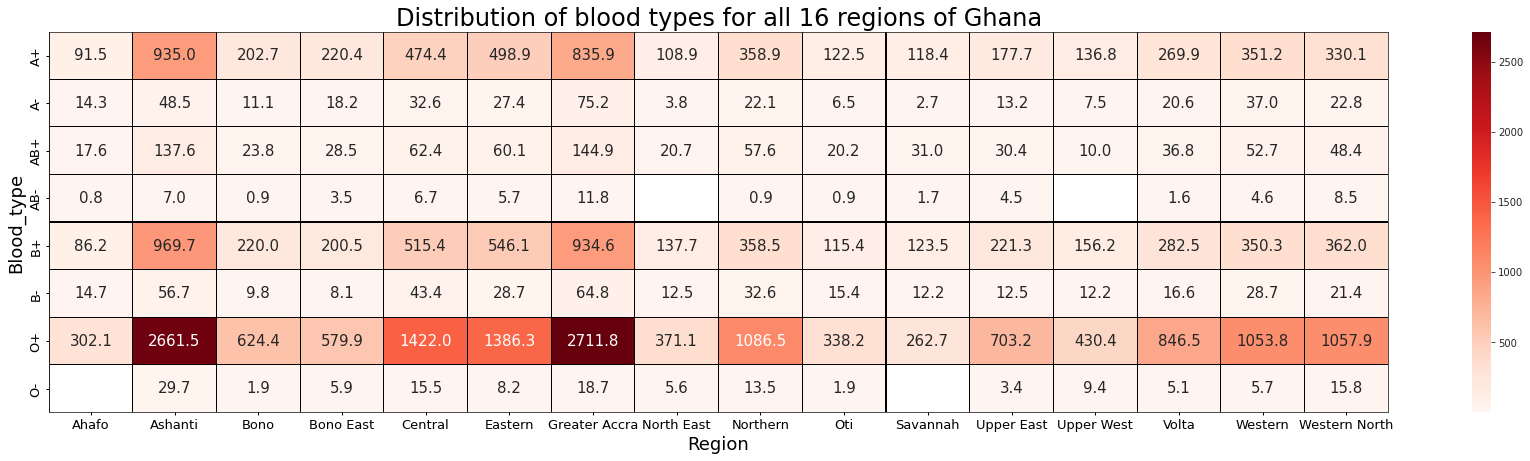

In [22]:
#Distribution of blood types of donations across the 16 regions of Ghana

actors= df_bloodservice.pivot_table(index='blood_type_x',columns='region',values='donation_amount_pints',aggfunc='sum')

f, ax = plt.subplots(figsize=(30,7))

ax = sns.heatmap(actors, cmap='Reds',linecolor='black',linewidths=0.1,annot=True,fmt='.1f',annot_kws={'fontsize':15})

ax.tick_params(axis = 'y',length=3, width=1, colors='black',labelsize=13)
ax.tick_params(axis = 'x',length=3, width=1, colors='black',labelsize=13)
kwargs= {'fontsize':18, 'color':'black'}
ax.set_xlabel('Region',**kwargs)
ax.set_ylabel('Blood_type',**kwargs)
ax.set_title('Distribution of blood types for all 16 regions of Ghana',fontsize=24, color='black')
sns.despine(top=False,right = False)
plt.show()

## Analysis: As indicated earlier, all regions have low donated amounts of blood types O- and AB- with some having no donations at all over the 2year period. 
## This would require effective collaboration between blood banks in the various regions to ensure there is adequate supply for patients in need of these blood types.

#**9. Donation in numbers**
Statistics of donation count and amount per day over 2years

In [23]:
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

In [24]:
#Interactive plot of donations over time

import plotly.io as pio

aggs = ["count","sum","avg","median","mode"]

agg = []
agg_func = []
for i in range(0, len(aggs)):
    agg = dict(
        args=['transforms[0].aggregations[0].func', aggs[i]],
        label=aggs[i],
        method='restyle'
    )
    agg_func.append(agg)


data = [dict(
  type = 'line',
  x = df_bloodservice.donation_date,
  y = df_bloodservice.donation_amount_pints,
  mode = 'markers',
  transforms = [dict(
    type = 'aggregate',
    groups = df_bloodservice.donation_date,
    aggregations = [dict(
        target = 'y', func = 'sum', enabled = True)
    ]
  )]
)]

layout = dict(
  title = '<b>Donations in numbers</b><br>use dropdown to change aggregation',
  xaxis = dict(title = 'Month_year'),
  yaxis = dict(title = 'Donation count/amount(pints)'),
  updatemenus = [dict(
        x = 0.85,
        y = 1.15,
        xref = 'paper',
        yref = 'paper',
        yanchor = 'top',
        active = 1,
        showactive = False,
        buttons = agg_func
  )]
)

#fig_dict.write_html("/content/bloodservice_interactiveplot.html")

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)



#**10. Linear regression Models for donation volume trends using sklearn and scipy**

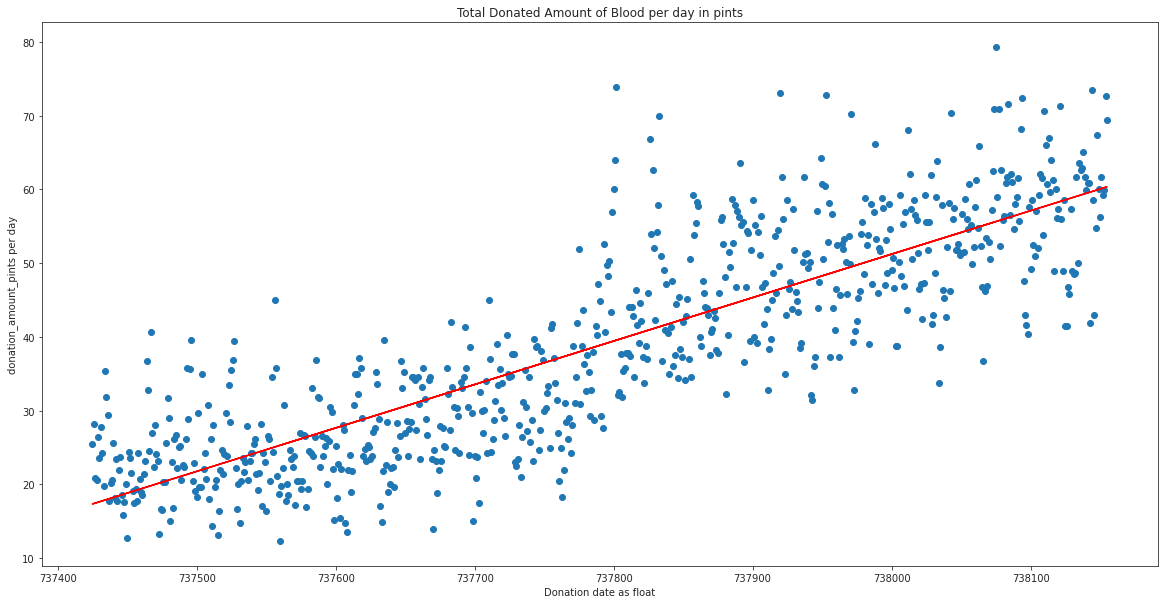

The equation of the linear regression line using scipy is:
y =  0.05889903761524458x + -43416.287446419425


In [27]:
#Linear Regression with Scipy

df_bloodservice['donation_date'] = pd.to_datetime(df_bloodservice['donation_date'])
df_bloodservice['donation_date']=df_bloodservice['donation_date'].map(dt.datetime.toordinal)

data_3 = df_bloodservice.groupby('donation_date')['donation_amount_pints'].sum().sort_values(ascending=False)
x=data_3.index
y= data_3.values

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.plot(x, mymodel, 'r')
plt.xlabel('Donation date as float')
plt.ylabel('donation_amount_pints per day')
plt.title('Total Donated Amount of Blood per day in pints')
plt.show()

print('The equation of the linear regression line using scipy is:')
print('y = ', str(slope) + 'x +', float(intercept))

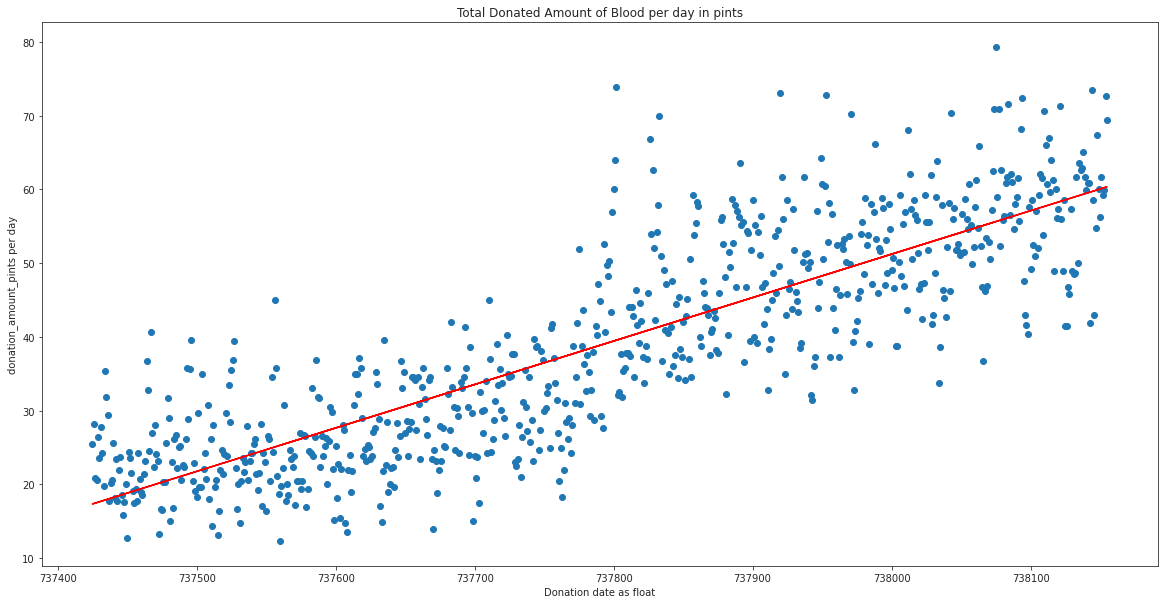

The equation of the linear regression line using sklearn is:
y =  0.05889903761524459x + -43416.28744641943


In [28]:
#Linear Regression with Sklearn

data_3 = df_bloodservice.groupby('donation_date')['donation_amount_pints'].sum().sort_values(ascending=False)
x=data_3.index
y= data_3.values

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

reg = LinearRegression()
reg = reg.fit(x, y)
reg.score(x, y)
coef_=reg.coef_
intercept_=reg.intercept_

plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.plot(x, reg.predict(x), 'r')
plt.xlabel('Donation date as float')
plt.ylabel('donation_amount_pints per day')
plt.title('Total Donated Amount of Blood per day in pints')
plt.show()

print('The equation of the linear regression line using sklearn is:')
print('y = ', str(float(coef_)) + 'x +', float(intercept_))

####**-----------------------------------------------------------------------------------------------------------------------**
####**-----------------------------------------------------------------------------------------------------------------------**

#**11. Modelling of far historic data using RFM**


Read the donor dataframe again but this time for only the far historic data. This is used to build a model that predicts whether or not a donor will donate in a target month.

Load only columns 9 to 13

In [29]:
donors='https://raw.githubusercontent.com/obengdouglas/DSI-2022/main/capstone_bloodservice/Data/bloodservice_donor.csv'

df_donors = pd.read_csv(donors, sep=",", skip_blank_lines=True, na_filter=True, usecols=[9,10,11,12,13], nrows = 748)



In [30]:
df_donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   recency_months                     748 non-null    int64
 1   frequency_times                    748 non-null    int64
 2   monetary_total_donation_amount_cc  748 non-null    int64
 3   time_months_since_first_donation   748 non-null    int64
 4   donated_blood_observed_month       748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [31]:
#Rename dataframe as model

model = df_donors
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   recency_months                     748 non-null    int64
 1   frequency_times                    748 non-null    int64
 2   monetary_total_donation_amount_cc  748 non-null    int64
 3   time_months_since_first_donation   748 non-null    int64
 4   donated_blood_observed_month       748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [32]:
model.tail()

,recency_months,frequency_times,monetary_total_donation_amount_cc,time_months_since_first_donation,donated_blood_observed_month
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


#Inspecting dataframe

RFM stands for Recency, Frequency and Monetary Value and it is commonly used in marketing for identifying your best customers. In our case, our customers are blood donors.

RFMTC is a variation of the RFM model. Below is a description of what each column means in our dataset:

- R (Recency - months since the last donation)
- F (Frequency - total number of donation)
- M (Monetary - total blood donated in c.c.)
- T (Time - months since the first donation)
- C (a binary variable representing whether he/she donated blood in March 2007; target. 1 stands for donating blood; 0 stands for not donating blood)

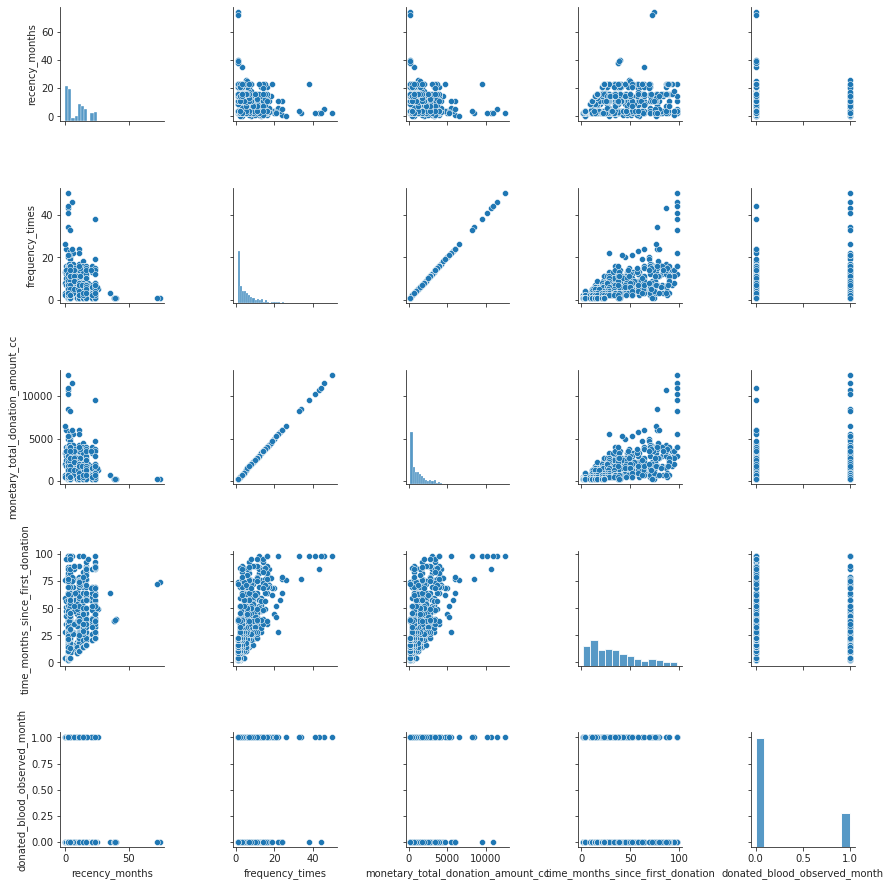

In [33]:
sns.pairplot(model)

In [34]:
# Now seperate the dependant and inpedepandant variable before proceeding

X = model.iloc[:,:-1]
Y = model.iloc[:, -1]

In [35]:
X

,recency_months,frequency_times,monetary_total_donation_amount_cc,time_months_since_first_donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [36]:
Y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: donated_blood_observed_month, Length: 748, dtype: int64

In [37]:
model['donated_blood_observed_month']=model['donated_blood_observed_month'].astype('category')

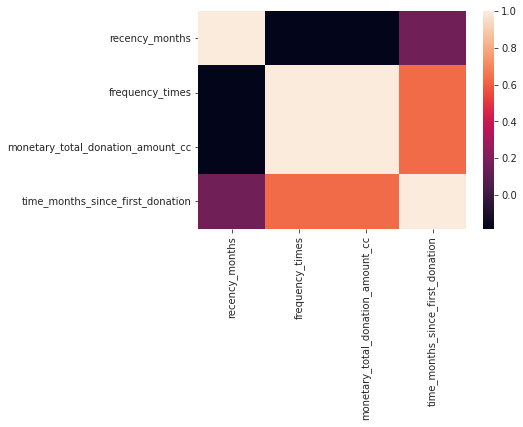

In [38]:
#3. Heatplot to visualise correlation

sns.heatmap(model.corr())

In [39]:
## spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 123)

In [40]:
##Feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [41]:
# Initial logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(C=0.001)
model_base = clf.fit(X_train, y_train)
y_pred = model_base.predict(X_test)
model_base.score(X_test, y_test)

print("Model accuracy is", model_base.score(X_test, y_test))

Model accuracy is 0.7333333333333333


In [42]:
metrics.confusion_matrix(y_test, y_pred)
# print(metrics.classification_report(y_test, y_pred))

array([[110,   0],
       [ 40,   0]])

In [43]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, except for max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [44]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       110
           1       0.54      0.17      0.26        40

    accuracy                           0.74       150
   macro avg       0.65      0.56      0.55       150
weighted avg       0.70      0.74      0.69       150



In [45]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [46]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.7333333333333333


In [47]:
# Fitting all models
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Fitting the models and calculating test and training score
classifier= {
    'Logistic Regression':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(),
    'DecisionTree':DecisionTreeClassifier()
}

import warnings
warnings.filterwarnings('ignore')
for key,values in classifier.items():
    values.fit(X_train,y_train)
    training_score= cross_val_score(values,X_train,y_train,cv=5)
    print('Training accuracy score of {} is {}'.format(key,round(training_score.mean()*100,2)))
    train_pred = cross_val_predict(values, X_train,y_train, cv=5)
    print('Roc_Auc training score for {} is {}: '.format(key, round(roc_auc_score(y_train,train_pred)*100,2)))
    test_score= cross_val_score(values,X_test,y_test,cv=5)
    print('Test accuracy score of {} is {}'.format(key,round(test_score.mean()*100,2)))
    test_pred = cross_val_predict(values, X_test, y_test, cv=5)
    print('Roc_Auc test score for {} is {}: '.format(key, round(roc_auc_score(y_test,test_pred)*100,2)))
    print('---'*30)

Training accuracy score of Logistic Regression is 78.93
Roc_Auc training score for Logistic Regression is 57.14: 
Test accuracy score of Logistic Regression is 73.33
Roc_Auc test score for Logistic Regression is 53.18: 
------------------------------------------------------------------------------------------
Training accuracy score of KNN is 76.58
Roc_Auc training score for KNN is 60.94: 
Test accuracy score of KNN is 67.33
Roc_Auc test score for KNN is 53.86: 
------------------------------------------------------------------------------------------
Training accuracy score of SVC is 78.93
Roc_Auc training score for SVC is 57.9: 
Test accuracy score of SVC is 72.67
Roc_Auc test score for SVC is 49.55: 
------------------------------------------------------------------------------------------
Training accuracy score of DecisionTree is 73.91
Roc_Auc training score for DecisionTree is 60.18: 
Test accuracy score of DecisionTree is 60.0
Roc_Auc test score for DecisionTree is 51.7: 
------

#**12. Conclusion**

From the analysis,

1. Greater Accra and Ashanti Regions have the largest number of donors as well as volume of blood donated. This is consistent with their status as the most populated regions.
2. There is no marked difference in the distribution of age among donors.
3. The number of donations in all regions has largely kept increasing since the beginning of 2020. Late 2021 numbers are almost twice as much as early 2020.
4. A maximum training accuracy score of 78.93 obtained for prediction model using linear regression

#  Please note deployment of further data analytics in Tableau dashboard - 